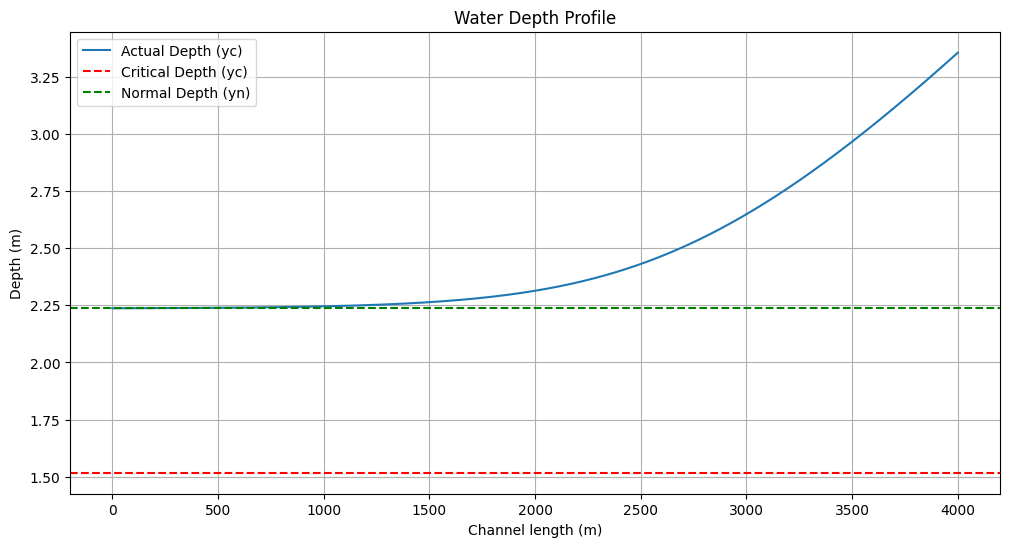

In [ ]:
# WATER SURFACE PROFILES: GRADUALLY VARIED FLOW PROFILES
# 21CE10056
import math
import matplotlib.pyplot as plt

# Given parameters
So = 0.001  # Longitudinal bed slope
n = 0.02  # Manning’s coefficient
Q = 66  # Flow rate
b = 10  # Bottom width
m = 1.5  # Side slope
g = 9.81

yc = 1.518  # Critical depth (from Problem 2)
yn = 2.236  # Normal depth (from Problem 2)


yi = 1.5 * yn #starting from end(boundary condition)
ya = []  # List to store actual depths

dx = -1  # step(negative sign because, iterating upstream i.e. backwards .)

# Function to calculate f(y)
def f(y):
    A = (b + m * y) * y  # Cross-sectional area
    Pw = b + 2 * y * ((1 + m ** 2) ** (1 / 2))  # Wetted perimeter
    T = b + 2 * m * y  # Top width
    return (So - (n ** 2) * (Q ** 2) * (Pw ** (4 / 3) / A ** (10 / 3))) / (1 - (Q ** 2) * T / (g * (A ** 3)))


x = 4000   # Length of channel
while x >=0:
    ya.insert(0, yi)  # Store current depth
    x -= 1
    # Runge-Kutta method for numerical integration
    y_temp = yi + 0.5 * f(yi) * dx  # Temporary y value
    yi_new = yi + f(y_temp) * dx  # New y value
    yi = yi_new

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ya, label='Actual Depth (yc)')  # Plot actual depth
plt.axhline(y=yc, color='r', linestyle='--', label='Critical Depth (yc)')  # Plot critical depth
plt.axhline(y=yn, color='g', linestyle='--', label='Normal Depth (yn)')  # Plot normal depth
plt.xlabel('Channel length (m)')
plt.ylabel('Depth (m)')
plt.title('Water Depth Profile')
plt.legend()
plt.grid(True)
plt.show()
